In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df1 = pd.read_csv(r"https://raw.githubusercontent.com/Perovsky56/BankLoanModel/refs/heads/main/datasets/Loan.csv")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [3]:
print(df1.columns)

Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore', 'EmploymentStatus',
       'EducationLevel', 'Experience', 'LoanAmount', 'LoanDuration', 'MaritalStatus',
       'NumberOfDependents', 'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries',
       'DebtToIncomeRatio', 'BankruptcyHistory', 'LoanPurpose', 'PreviousLoanDefaults',
       'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome',
       'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth', 'BaseInterestRate', 'InterestRate',
       'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'],
      dtype='object')


In [4]:
print(df1.head(3))

  ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus EducationLevel  Experience  \
0      2018-01-01   45         39948          617         Employed         Master          22   
1      2018-01-02   38         39709          628         Employed      Associate          15   
2      2018-01-03   47         40724          570         Employed       Bachelor          26   

   LoanAmount  LoanDuration MaritalStatus  NumberOfDependents HomeOwnershipStatus  \
0       13152            48       Married                   2                 Own   
1       26045            48        Single                   1            Mortgage   
2       17627            36       Married                   2                Rent   

   MonthlyDebtPayments  CreditCardUtilizationRate  NumberOfOpenCreditLines  \
0                  183                   0.354418                        1   
1                  496                   0.087827                        5   
2                  902              

In [5]:
df1 = df1.drop(['ApplicationDate', 'CreditScore', 'HomeOwnershipStatus', 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory', 'UtilityBillsPaymentHistory', 'BaseInterestRate', 'InterestRate', 'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'], axis=1)

In [6]:
df1.head(3)

,Age,AnnualIncome,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,MonthlyDebtPayments,BankruptcyHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,JobTenure,NetWorth,MonthlyLoanPayment
0,45,39948,Employed,Master,22,13152,48,Married,2,183,0,7632,1202,146111,19183,3329.000000,11,126928,419.805992
1,38,39709,Employed,Associate,15,26045,48,Single,1,496,0,4627,3460,53204,9595,3309.083333,3,43609,794.054238
2,47,40724,Employed,Bachelor,26,17627,36,Married,2,902,0,886,895,25176,128874,3393.666667,6,5205,666.406688


In [7]:
columns_to_move = ['LoanAmount', 'LoanDuration']

cols = [col for col in df1.columns if col not in columns_to_move] + columns_to_move
df1 = df1[cols]

In [8]:
df1.sample(15)

,Age,AnnualIncome,EmploymentStatus,EducationLevel,Experience,MaritalStatus,NumberOfDependents,MonthlyDebtPayments,BankruptcyHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,JobTenure,NetWorth,MonthlyLoanPayment,LoanAmount,LoanDuration
8825,23,15599,Employed,High School,0,Single,4,420,0,2636,502,33468,47460,1299.916667,4,3226,813.686971,24504,48
8642,53,30498,Employed,High School,26,Single,0,530,0,5600,1132,41613,12774,2541.500000,7,28839,690.204742,21139,48
10291,23,15000,Employed,High School,0,Married,4,403,0,2737,372,84789,6923,1250.000000,7,77866,894.121552,21571,36
960,47,70915,Employed,High School,25,Single,3,613,0,515,1489,61902,30048,5909.583333,3,31854,1121.471983,37814,60
9166,24,51382,Unemployed,Associate,3,Single,0,762,0,16230,2604,62667,17691,4281.833333,9,44976,1246.876126,31370,36
15016,31,59430,Self-Employed,Bachelor,9,Married,1,364,0,1161,4153,70721,297450,4952.500000,6,4712,609.784906,22077,72
8001,33,49259,Employed,Bachelor,9,Divorced,4,222,0,1837,1381,238141,19735,4104.916667,6,218406,745.015373,27126,60
715,53,44932,Employed,Associate,29,Single,0,622,0,908,158,127302,19473,3744.333333,1,107829,847.978854,28847,120
19479,40,25431,Employed,Associate,18,Single,0,817,0,2252,2578,84628,16458,2119.250000,8,68170,1180.855942,36336,120
4475,46,100605,Employed,Master,22,Single,2,487,0,4851,456,80511,12604,8383.750000,2,67907,389.264485,13719,60


In [9]:
df1.shape

(20000, 19)

In [10]:
df1.dtypes

,0
Age,int64
AnnualIncome,int64
EmploymentStatus,object
EducationLevel,object
Experience,int64
MaritalStatus,object
NumberOfDependents,int64
MonthlyDebtPayments,int64
BankruptcyHistory,int64
SavingsAccountBalance,int64


In [11]:
df1.describe()

,Age,AnnualIncome,Experience,NumberOfDependents,MonthlyDebtPayments,BankruptcyHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,JobTenure,NetWorth,MonthlyLoanPayment,LoanAmount,LoanDuration
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,2.000000e+04,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,17.522750,1.517300,454.292700,0.052400,4946.052150,1782.555100,9.696440e+04,3.625241e+04,4891.715521,5.002650,7.229432e+04,911.607052,24882.867800,54.057000
std,11.622713,40350.845168,11.316836,1.386325,240.507609,0.222838,6604.887477,2245.378812,1.207999e+05,4.725151e+04,3296.771598,2.236804,1.179200e+05,674.583473,13427.421217,24.664857
min,18.000000,15000.000000,0.000000,0.000000,50.000000,0.000000,73.000000,24.000000,2.098000e+03,3.720000e+02,1250.000000,0.000000,1.000000e+03,97.030193,3674.000000,12.000000
25%,32.000000,31679.000000,9.000000,0.000000,286.000000,0.000000,1541.750000,551.000000,3.118025e+04,1.119675e+04,2629.583333,3.000000,8.734750e+03,493.763700,15575.000000,36.000000
50%,40.000000,48566.000000,17.000000,1.000000,402.000000,0.000000,2986.000000,1116.000000,6.069900e+04,2.220300e+04,4034.750000,5.000000,3.285550e+04,728.511452,21914.500000,48.000000
75%,48.000000,74391.000000,25.000000,2.000000,564.000000,0.000000,5873.250000,2126.000000,1.174052e+05,4.314650e+04,6163.000000,6.000000,8.882550e+04,1112.770759,30835.000000,72.000000
max,80.000000,485341.000000,61.000000,5.000000,2919.000000,1.000000,200089.000000,52572.000000,2.619627e+06,1.417302e+06,25000.000000,16.000000,2.603208e+06,10892.629520,184732.000000,120.000000


In [12]:
nulls_summary = pd.DataFrame(df1.isnull().any(), columns=['Nulls'])
nulls_summary['Num_of_nulls [qty]'] = pd.DataFrame(df1.isnull().sum())
nulls_summary['Num_of_nulls [%]'] = round((df1.isnull().mean()*100),2)
print(nulls_summary)

                        Nulls  Num_of_nulls [qty]  Num_of_nulls [%]
Age                     False                   0               0.0
AnnualIncome            False                   0               0.0
EmploymentStatus        False                   0               0.0
EducationLevel          False                   0               0.0
Experience              False                   0               0.0
MaritalStatus           False                   0               0.0
NumberOfDependents      False                   0               0.0
MonthlyDebtPayments     False                   0               0.0
BankruptcyHistory       False                   0               0.0
SavingsAccountBalance   False                   0               0.0
CheckingAccountBalance  False                   0               0.0
TotalAssets             False                   0               0.0
TotalLiabilities        False                   0               0.0
MonthlyIncome           False                   

In [13]:
mapping1 = {'Employed': 0, 'Self-Employed': 1, 'Unemployed': 2}
mapping2 = {'High School': 0, 'Associate': 1, 'Bachelor': 2, 'Master': 3, 'Doctorate': 4}
mapping3 = {'Single': 0, 'Married': 1, 'Divorced': 2, 'Widowed': 3}

df1['EmploymentStatus'] = df1['EmploymentStatus'].replace(mapping1)
df1['EducationLevel'] = df1['EducationLevel'].replace(mapping2)
df1['MaritalStatus'] = df1['MaritalStatus'].replace(mapping3)
print(df1[['EmploymentStatus']])
df1.dtypes

<ipython-input-13-201dfa7537d8>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['EmploymentStatus'] = df1['EmploymentStatus'].replace(mapping1)
<ipython-input-13-201dfa7537d8>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['EducationLevel'] = df1['EducationLevel'].replace(mapping2)
<ipython-input-13-201dfa7537d8>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future

       EmploymentStatus
0                     0
1                     0
2                     0
3                     0
4                     0
...                 ...
19995                 0
19996                 0
19997                 0
19998                 0
19999                 0

[20000 rows x 1 columns]


,0
Age,int64
AnnualIncome,int64
EmploymentStatus,int64
EducationLevel,int64
Experience,int64
MaritalStatus,int64
NumberOfDependents,int64
MonthlyDebtPayments,int64
BankruptcyHistory,int64
SavingsAccountBalance,int64


In [14]:
excluded_columns = ['LoanDuration', 'LoanAmount']
selected_columns = [col for col in df1.columns if col not in excluded_columns]

X = df1[selected_columns]
y = df1[['LoanAmount', 'LoanDuration']]

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
base_model = RandomForestRegressor(n_estimators=100, random_state=42)
model = MultiOutputRegressor(base_model)

# Trenowanie modelu
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [16]:
model2 = MultiOutputRegressor(GradientBoostingRegressor(n_estimators=100, random_state=42))
model2.fit(X_train, y_train)

MultiOutputRegressor(estimator=GradientBoostingRegressor(random_state=42))

In [20]:
y_pred = model.predict(X_test)
y_pred2 = model2.predict(X_test)

In [21]:
mse_loan_amount = mean_squared_error(y_test["LoanAmount"], y_pred[:, 0])
mse_loan_duration = mean_squared_error(y_test["LoanDuration"], y_pred[:, 1])
mae_loan_amount = mean_absolute_error(y_test["LoanAmount"], y_pred[:, 0])
mae_loan_duration = mean_absolute_error(y_test["LoanDuration"], y_pred[:, 1])
r2_loan_amount = r2_score(y_test["LoanAmount"], y_pred[:, 0])
r2_loan_duration = r2_score(y_test["LoanDuration"], y_pred[:, 1])

print(f'MSE Loan Amount: {mse_loan_amount}')
print(f'MSE Loan Duration: {mse_loan_duration}')
print(f'MAE Loan Amount: {mae_loan_amount}')
print(f'MAE Loan Duration: {mae_loan_duration}')
print(f'R2 Loan Amount: {r2_loan_amount}')
print(f'R2 Loan Duration: {r2_loan_duration}')


MSE Loan Amount: 58591705.44728697
MSE Loan Duration: 524.96523
MAE Loan Amount: 4931.4972975
MAE Loan Duration: 18.06849
R2 Loan Amount: 0.6523254717140253
R2 Loan Duration: 0.12529119984864845


In [22]:
mse_loan_amount = mean_squared_error(y_test["LoanAmount"], y_pred2[:, 0])
mse_loan_duration = mean_squared_error(y_test["LoanDuration"], y_pred2[:, 1])
mae_loan_amount = mean_absolute_error(y_test["LoanAmount"], y_pred2[:, 0])
mae_loan_duration = mean_absolute_error(y_test["LoanDuration"], y_pred2[:, 1])
r2_loan_amount = r2_score(y_test["LoanAmount"], y_pred2[:, 0])
r2_loan_duration = r2_score(y_test["LoanDuration"], y_pred2[:, 1])

print(f'MSE Loan Amount: {mse_loan_amount}')
print(f'MSE Loan Duration: {mse_loan_duration}')
print(f'MAE Loan Amount: {mae_loan_amount}')
print(f'MAE Loan Duration: {mae_loan_duration}')
print(f'R2 Loan Amount: {r2_loan_amount}')
print(f'R2 Loan Duration: {r2_loan_duration}')


MSE Loan Amount: 56601506.1404193
MSE Loan Duration: 504.79170779199455
MAE Loan Amount: 4860.221536642253
MAE Loan Duration: 17.644827430333695
R2 Loan Amount: 0.6641350205217966
R2 Loan Duration: 0.15890477346644993


In [23]:
y_pred = pd.DataFrame(y_pred)
#y_pred.rename(columns={0:'LoanAmount'},inplace=True)
#y_pred.sort_values(by=['LoanAmount'], inplace=True)

#y_train.rename(columns={0:'LoanAmount'},inplace=True)
#y_train.sort_values(by=['LoanAmount'], inplace=True)

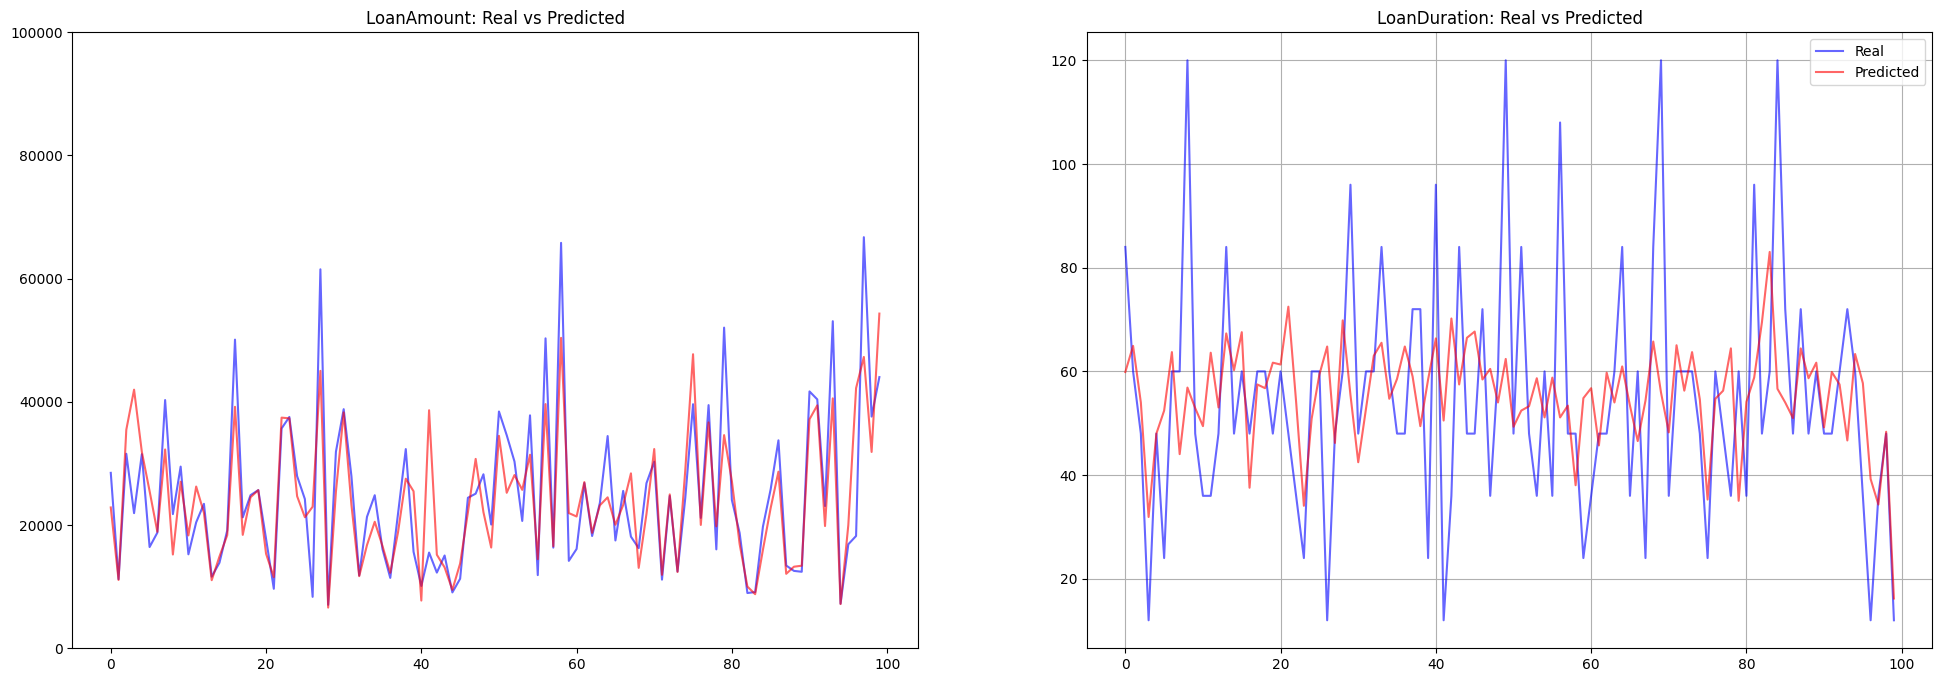

In [27]:
fig, ax = plt.subplots(1,2, figsize=(24, 8))

# Wykres dla LoanAmount
ax[0].plot(range(100), y_test.iloc[0:100, 0], color='blue', label='Real', alpha=0.6)
ax[0].plot(range(100), y_pred.iloc[0:100, 0], color='red', label='Predicted', alpha=0.6)
ax[0].set_title('LoanAmount: Real vs Predicted')
ax[0].set_ylim(0, 100_000)
ax[0].set_xlabel('')
ax[0].set_ylabel('')


ax[1].plot(range(100), y_test.iloc[0:100, 1], color='blue', label='Real', alpha=0.6)
ax[1].plot(range(100), y_pred.iloc[0:100, 1], color='red', label='Predicted', alpha=0.6)
ax[1].set_title('LoanDuration: Real vs Predicted')
ax[1].set_xlabel('')
ax[1].set_ylabel('')

plt.legend()
plt.grid(True)
plt.show()


In [28]:
clientdata = {'Age': [20],
              'AnnualIncome': [20000],
              'EmploymentStatus': [1],
              'EducationLevel': [2],
              'Experience': [15],
              'MaritalStatus': [1],
              'NumberOfDependents': [2],
              'MonthlyDebtPayments': [300],
              'BankruptcyHistory': [0.1],
              'SavingsAccountBalance': [5000],
              'CheckingAccountBalance': [2000],
              'TotalAssets': [9.696440e+04],
              'TotalLiabilities': [3.625241e+04],
              'MonthlyIncome': [5000],
              'JobTenure': [3],
              'NetWorth': [7.229432e+03],
              'MonthlyLoanPayment': [500]
        }

client = pd.DataFrame(clientdata)

In [29]:
y_val = model.predict(client)
y = pd.DataFrame(y_val)

In [30]:
wynik = y_val[:,0] / y_val[:,1]

print(f"Maksymalna zdolność kredytowa: {y.iloc[0, 0]:.2f}")
print(f"Minimalna ilość miesięcy kredytu(dla kwoty maksymalnej) {np.ceil(y.iloc[0,1]):.0f}")
print(f"Maksymalna rata miesięczna: {wynik[0]:.2f} dolary")

Maksymalna zdolność kredytowa: 16950.90
Minimalna ilość miesięcy kredytu(dla kwoty maksymalnej) 66
Maksymalna rata miesięczna: 259.19 dolary


In [32]:
from IPython.display import display
import ipywidgets as widgets

In [116]:
style = {'description_width': 'initial'}

age = widgets.IntText(value=20, description='Age:', style=style)
annual_income = widgets.FloatText(value=20000, description='Annual Income:', style=style)
employment_status = widgets.Dropdown(options=mapping1.keys(), description='Employment Status:', style=style)
education_level = widgets.Dropdown(options=mapping2.keys(), description='Education Level:', style=style)
experience = widgets.IntText(value=15, description='Experience:', style=style)
marital_status = widgets.Dropdown(options=mapping3.keys(), description='Marital Status:', style=style)
number_of_dependents = widgets.IntText(value=2, description='Number of Dependents:', style=style)
monthly_debt_payments = widgets.FloatText(value=300, description='Monthly Debt Payments:', style=style)
bankruptcy_history = widgets.FloatText(value=0.1, description='Bankruptcy History:', style=style)
savings_account_balance = widgets.FloatText(value=5000, description='Savings Account Balance:', style=style)
checking_account_balance = widgets.FloatText(value=2000, description='Checking Account Balance:', style=style)
total_assets = widgets.FloatText(value=96964.40, description='Total Assets:', style=style)
total_liabilities = widgets.FloatText(value=36252.41, description='Total Liabilities:', style=style)
monthly_income = widgets.FloatText(value=5000, description='Monthly Income:', style=style)
job_tenure = widgets.IntText(value=3, description='Job Tenure:', style=style)
net_worth = widgets.FloatText(value=7229.432, description='Net Worth:', style=style)
monthly_loan_payment = widgets.FloatText(value=500, description='Monthly Loan Payment:', style=style)

loan_amount = widgets.FloatText(value=0, description='Loan Amount:', style=style)
loan_months = widgets.IntText(value=0, description='Loan Months:', style=style)

display(age, annual_income, employment_status, education_level, experience, marital_status,
        number_of_dependents, monthly_debt_payments, bankruptcy_history, savings_account_balance,
        checking_account_balance, total_assets, total_liabilities, monthly_income, job_tenure,
        net_worth, monthly_loan_payment, loan_amount, loan_months)

IntText(value=20, description='Age:', style=DescriptionStyle(description_width='initial'))

FloatText(value=20000.0, description='Annual Income:', style=DescriptionStyle(description_width='initial'))

Dropdown(description='Employment Status:', options=('Employed', 'Self-Employed', 'Unemployed'), style=Descript…

Dropdown(description='Education Level:', options=('High School', 'Associate', 'Bachelor', 'Master', 'Doctorate…

IntText(value=15, description='Experience:', style=DescriptionStyle(description_width='initial'))

Dropdown(description='Marital Status:', options=('Single', 'Married', 'Divorced', 'Widowed'), style=Descriptio…

IntText(value=2, description='Number of Dependents:', style=DescriptionStyle(description_width='initial'))

FloatText(value=300.0, description='Monthly Debt Payments:', style=DescriptionStyle(description_width='initial…

FloatText(value=0.1, description='Bankruptcy History:', style=DescriptionStyle(description_width='initial'))

FloatText(value=5000.0, description='Savings Account Balance:', style=DescriptionStyle(description_width='init…

FloatText(value=2000.0, description='Checking Account Balance:', style=DescriptionStyle(description_width='ini…

FloatText(value=96964.4, description='Total Assets:', style=DescriptionStyle(description_width='initial'))

FloatText(value=36252.41, description='Total Liabilities:', style=DescriptionStyle(description_width='initial'…

FloatText(value=5000.0, description='Monthly Income:', style=DescriptionStyle(description_width='initial'))

IntText(value=3, description='Job Tenure:', style=DescriptionStyle(description_width='initial'))

FloatText(value=7229.432, description='Net Worth:', style=DescriptionStyle(description_width='initial'))

FloatText(value=500.0, description='Monthly Loan Payment:', style=DescriptionStyle(description_width='initial'…

FloatText(value=0.0, description='Loan Amount:', style=DescriptionStyle(description_width='initial'))

IntText(value=0, description='Loan Months:', style=DescriptionStyle(description_width='initial'))

In [122]:
def get_client_data():
    clientdata = {
        'Age': [age.value],
        'AnnualIncome': [annual_income.value],
        'EmploymentStatus': [mapping1[employment_status.value]],
        'EducationLevel': [mapping2[education_level.value]],
        'Experience': [experience.value],
        'MaritalStatus': [mapping3[marital_status.value]],
        'NumberOfDependents': [number_of_dependents.value],
        'MonthlyDebtPayments': [monthly_debt_payments.value],
        'BankruptcyHistory': [bankruptcy_history.value],
        'SavingsAccountBalance': [savings_account_balance.value],
        'CheckingAccountBalance': [checking_account_balance.value],
        'TotalAssets': [total_assets.value],
        'TotalLiabilities': [total_liabilities.value],
        'MonthlyIncome': [monthly_income.value],
        'JobTenure': [job_tenure.value],
        'NetWorth': [net_worth.value],
        'MonthlyLoanPayment': [monthly_loan_payment.value]
    }
    return pd.DataFrame(clientdata)

client = get_client_data()

wynik = y_val[:,0] / y_val[:,1]

#print(f"Maksymalna zdolność kredytowa: {y.iloc[0, 0]:.2f}")
#print(f"Minimalna ilość miesięcy kredytu(dla kwoty maksymalnej) {np.ceil(y.iloc[0,1]):.0f}")
#print(f"Maksymalna rata miesięczna: {wynik[0]:.2f} dolary\n")

max_loan_amount = y.iloc[0, 0]
max_loan_months = np.ceil(y.iloc[0,1])
max_monthly_payment = max_loan_amount / max_loan_months

loan_amt = loan_amount.value
loan_mths = loan_months.value

interest_rate = 0.05
total_interest = loan_amt * (interest_rate * loan_mths / 12)
total_loan_with_interest = loan_amt + total_interest

if loan_mths > 0:
    monthly_payment = total_loan_with_interest / loan_mths
    if monthly_payment <= max_monthly_payment:
        print(f"Kwota kredytu: {loan_amt:.2f} dolary")
        print(f"Liczba miesięcy: {loan_mths}")
        print(f"Rata miesięczna: {monthly_payment:.2f} dolary")
    else:
        print("Maksymalna rata miesięczna została przekroczona. Zmniejsz kwotę kredytu lub zwiększ liczbę miesięcy.")
else:
    print("Liczba miesięcy musi być większa niż 0.")

Kwota kredytu: 10000.00 dolary
Liczba miesięcy: 60
Rata miesięczna: 208.33 dolary
